
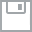
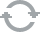
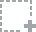
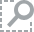
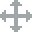
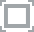
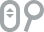
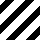
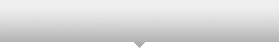
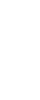
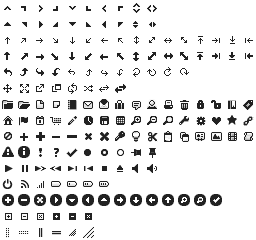
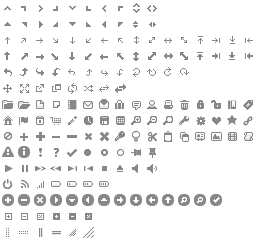
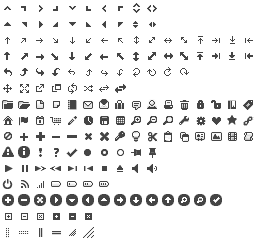
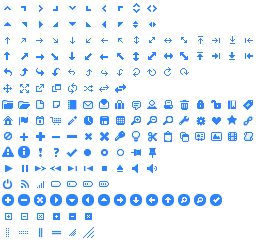
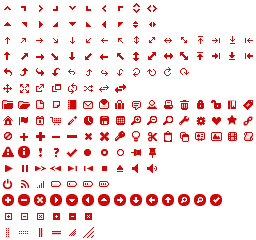
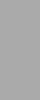
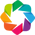
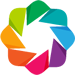

In [1]:
import pickle
import pandas as pd
import numpy as np
from bokeh.plotting import output_notebook, figure, show
from bokeh.palettes import RdBu4 as Palette
from datetime import datetime
import warnings

output_notebook()

After taking some time to explore how the weather in North Carolina stacked up over the past years, I was interested in doing the same analysis for other cities. Growing up with family from Binghamton, NY I was always told it was very cloudy there. And Seattle has a nasty reputation for being very depressing and cloudy. All said, the cities I want to examine are:
- Binghamton, NY
- Cary, NC
- Seattle, WA
- New York City, NY

I'd be interested to try this analysis worldwide at some point - comparing London and Seattle might be an interesting analysis. For now though, we'll stick with trying out the US data.

There will be plenty of charts. I want to know: **How has average cloud cover and precipitation chance changed over the years for each city mentioned?** This will hopefully tell us whether Seattle has actually earned its reputation for being a depressing city.

In [2]:
city_forecasts = pickle.load(open('city_forecasts.p', 'rb'))
forecasts_df = pd.DataFrame.from_dict(city_forecasts)

In [3]:
cities = ['binghamton', 'cary', 'nyc', 'seattle']
city_colors = {cities[i]: Palette[i] for i in range(0, 4)}

def safe_cover(frame):
    if frame and 'cloudCover' in frame:
        return frame['cloudCover']
    else:
        return np.NaN

def monthly_avg_cloudcover(city, year, month):
    dates = pd.DatetimeIndex(start=datetime(year, month, 1, 12),
                             end=datetime(year, month + 1, 1, 12),
                             freq='D', closed='left')
    cloud_cover_vals = list(map(lambda x: safe_cover(forecasts_df[city][x]['currently']), dates))
    cloud_cover_samples = len(list(filter(lambda x: x is not np.NaN, cloud_cover_vals)))
    # Ignore an issue with nanmean having all NaN values. We'll discuss the data issues below.
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        return np.nanmean(cloud_cover_vals), cloud_cover_samples

In [4]:
years = range(1990, 2016)
def city_avg_cc(city, month):
    return [monthly_avg_cloudcover(city, y, month) for y in years]

months = [
    ('July', 7),
    ('August', 8),
    ('September', 9),
    ('October', 10),
    ('November', 11)
]

for month, month_id in months:
    month_averages = {city: city_avg_cc(city, month_id) for city in cities}
    f = figure(title="{} Average Cloud Cover".format(month),
               x_axis_label='Year',
               y_axis_label='Cloud Cover Percentage')
    for city in cities:
        f.line(years, [x[0] for x in month_averages[city]],
               legend=city, color=city_colors[city])
    show(f)

Well, as it so happens it looks like there are some data issues. July's data is a bit sporadic, and 2013 seems to be missing from most months as well. I think really only two things can really be confirmed here:
- Seattle, specifically for the months of October and November, is in fact significantly more cloudy on average than are other cities
- All cities surveyed have seen average cloud cover decline over the months studied. There are data issues, but the trend seems clear.

Let's now move from cloud cover data to looking at average rainfall chance.

In [5]:
def safe_precip(frame):
    if frame and 'precipProbability' in frame:
        return frame['precipProbability']
    else:
        return np.NaN

def monthly_avg_precip(city, year, month):
    dates = pd.DatetimeIndex(start=datetime(year, month, 1, 12),
                             end=datetime(year, month + 1, 1, 12),
                             freq='D', closed='left')
    precip_vals = list(map(lambda x: safe_precip(forecasts_df[city][x]['currently']), dates))
    precip_samples = len(list(filter(lambda x: x is not np.NaN, precip_vals)))
    # Ignore an issue with nanmean having all NaN values. We'll discuss the data issues below.
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        return np.nanmean(precip_vals), precip_samples

def city_avg_precip(city, month):
    return [monthly_avg_precip(city, y, month) for y in years]

for month, month_id in months:
    month_averages = {city: city_avg_cc(city, month_id) for city in cities}
    f = figure(title="{} Average Precipitation Chance".format(month),
               x_axis_label='Year',
               y_axis_label='Precipitation Chance Percentage')
    for city in cities:
        f.line(years, [x[0] for x in month_averages[city]],
               legend=city, color=city_colors[city])
    show(f)

The same data issue caveats apply here: 2013 seems to be missing some data, and July has some issues as well. However, this seems to confirm the trends we saw with cloud cover:
- Seattle, specifically for the months of August, October, and November has had a consistently higher chance of rain than other cities surveyed.
- Average precipitation chance, just like average cloud cover, has been trending down over time.

# Conclusion

I have to admit I was a bit surprised after doing this analysis. Seattle showed a higher average cloud cover and average precipitation chance than did the other cities surveyed. Maybe Seattle is actually an objectively more depressing city to live in.

Well that's all for weather data at the moment. It's been a great experiment, but I think this is about as far as I'll be able to get with weather data without some domain knowledge. Talk again soon!